In [3]:
#import necessary files
import cPickle, gzip, numpy as np
import matplotlib.pyplot as plt
import random
# Load the dataset
%load_ext autoreload
%autoreload 2
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()
train_set_x, train_set_y = train_set
val_set_x, val_set_y = valid_set
test_set_x, test_set_y = test_set
print 'Training data shape: ', train_set_x.shape
print 'Train labels shape: ', train_set_y.shape
print 'Validation data shape: ', val_set_x.shape
print 'Validation labels shape: ', val_set_y.shape
print 'Test data shape: ', test_set_x.shape
print 'Test labels shape: ', test_set_y.shape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


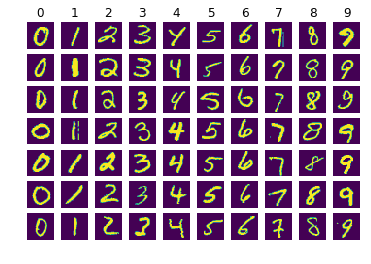

In [4]:
# Visualize some examples from the dataset.
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_set_y == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        show_image = train_set_x[idx].reshape([28,28])
        plt.imshow(show_image)
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
#Train the Network
from NeuralNet import TwoLayerNet
input_size = 28 * 28
hidden_size = 100
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)
mean_image = np.mean(train_set_x)
train_set_x -= mean_image
val_set_x -= mean_image
test_set_x -= mean_image
# Train the network
stats = net.train(train_set_x, train_set_y, val_set_x, val_set_y,
            num_iters=5000, batch_size=500,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.05,verbose = True)

# Predict on the validation set
val_acc = (net.predict(val_set_x) == val_set_y).mean()
print 'Validation accuracy: ', val_acc

iteration 0 / 5000: loss 2.500466
iteration 100 / 5000: loss 1.628124
iteration 200 / 5000: loss 1.181643
iteration 300 / 5000: loss 1.154496
iteration 400 / 5000: loss 1.154188
iteration 500 / 5000: loss 1.081040
iteration 600 / 5000: loss 1.088767
iteration 700 / 5000: loss 1.067551
iteration 800 / 5000: loss 1.083114
iteration 900 / 5000: loss 1.069995
iteration 1000 / 5000: loss 1.117276
iteration 1100 / 5000: loss 1.103234
iteration 1200 / 5000: loss 1.071008
iteration 1300 / 5000: loss 1.058266
iteration 1400 / 5000: loss 1.090654
iteration 1500 / 5000: loss 1.088456
iteration 1600 / 5000: loss 1.082903
iteration 1700 / 5000: loss 1.094185
iteration 1800 / 5000: loss 1.099358
iteration 1900 / 5000: loss 1.051308
iteration 2000 / 5000: loss 1.083431
iteration 2100 / 5000: loss 1.083016
iteration 2200 / 5000: loss 1.053192
iteration 2300 / 5000: loss 1.083450
iteration 2400 / 5000: loss 1.077803
iteration 2500 / 5000: loss 1.129003
iteration 2600 / 5000: loss 1.116153
iteration 270

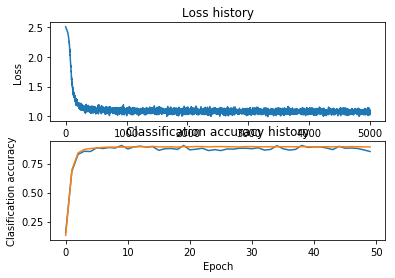

In [6]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [7]:
#print unique class values in output (to check for our network)
output = net.predict(val_set_x)
print np.unique(output)

[0 1 2 3 4 5 6 7 8 9]


In [8]:
#check against test data
test_acc = (net.predict(test_set_x) == test_set_y).mean()
print 'Test accuracy: ', test_acc

Test accuracy:  0.8918


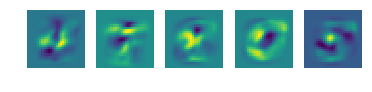

In [9]:
#visualise our W1 matrix
iterate = xrange(100)
to_show = 5
idxs = np.random.choice(iterate, to_show, replace=False)
for i,idx in enumerate(idxs):
    plt.subplot(1,to_show,i+1)
    W1 = net.params['W1']
    first = W1[:,idx]
    show_image = first.reshape([28,28])
    plt.imshow(show_image)
    plt.axis('off')
plt.show()
